In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image = np.array(Image.open('tiger.jpg'))
print(image)

[[[ 55 107  33]
  [ 56 108  34]
  [ 58 110  36]
  ...
  [143 118  87]
  [148 120  83]
  [142 114  77]]

 [[ 52 104  30]
  [ 54 106  32]
  [ 56 108  34]
  ...
  [146 119  89]
  [146 117  83]
  [140 111  77]]

 [[ 51 101  30]
  [ 53 103  32]
  [ 55 105  34]
  ...
  [147 116  85]
  [146 115  84]
  [140 109  78]]

 ...

 [[138 118 107]
  [112  92  81]
  [101  82  68]
  ...
  [167 130 104]
  [150 120  92]
  [184 154 126]]

 [[ 87  68  61]
  [ 62  44  34]
  [ 85  67  55]
  ...
  [169 132 105]
  [152 122  94]
  [187 157 129]]

 [[ 72  55  48]
  [ 46  27  20]
  [ 53  35  25]
  ...
  [148 111  82]
  [133 104  74]
  [125  96  66]]]


In [3]:
image = image / 255
row, col, _ = image.shape
print("pixels: ", row, "*", col)

pixels:  351 * 642


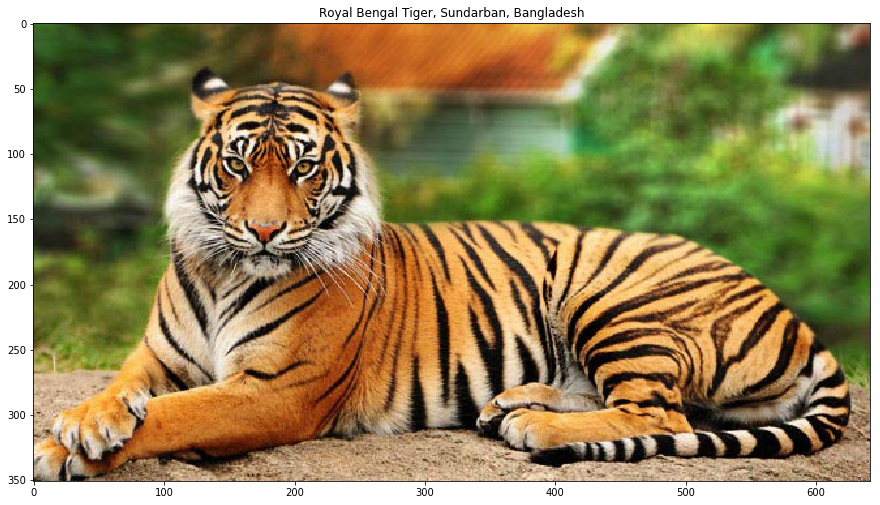

In [4]:
fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image)
a.set_title('Royal Bengal Tiger, Sundarban, Bangladesh')
plt.show()

In [5]:
image_red = image[:, :, 0]
image_green = image[:, :, 1]
image_blue = image[:, :, 2]

In [6]:
original_bytes = image.nbytes
print("The space needed to store this image is:", original_bytes/1024/1024, "MB")

The space needed to store this image is: 5.1576690673828125 MB


In [7]:
U_r, d_r, V_r = np.linalg.svd(image_red, full_matrices=True)
U_g, d_g, V_g = np.linalg.svd(image_green, full_matrices=True)
U_b, d_b, V_b = np.linalg.svd(image_blue, full_matrices=True)

In [8]:
bytes_to_be_stored = sum([matrix.nbytes for matrix in [U_r, d_r, V_r, U_g, d_g, V_g, U_b, d_b, V_b]])
print("The matrices that we store have total size: ", bytes_to_be_stored/1024/1024, "MB")

The matrices that we store have total size:  12.261566162109375 MB


In [9]:
k = 50

U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

compressed_bytes = sum([matrix.nbytes for matrix in 
                        [U_r_k, d_r_k, V_r_k, U_g_k, d_g_k, V_g_k, U_b_k, d_b_k, V_b_k]])
print("Compressed matrices have total size: ", compressed_bytes/1024/1024, "MB")

ratio = compressed_bytes / original_bytes
print("Compression ratio between the original image size and the total size of the compressed factors is: ", ratio)

Compressed matrices have total size:  1.137542724609375 MB
Compression ratio between the original image size and the total size of the compressed factors is:  0.2205536473449246


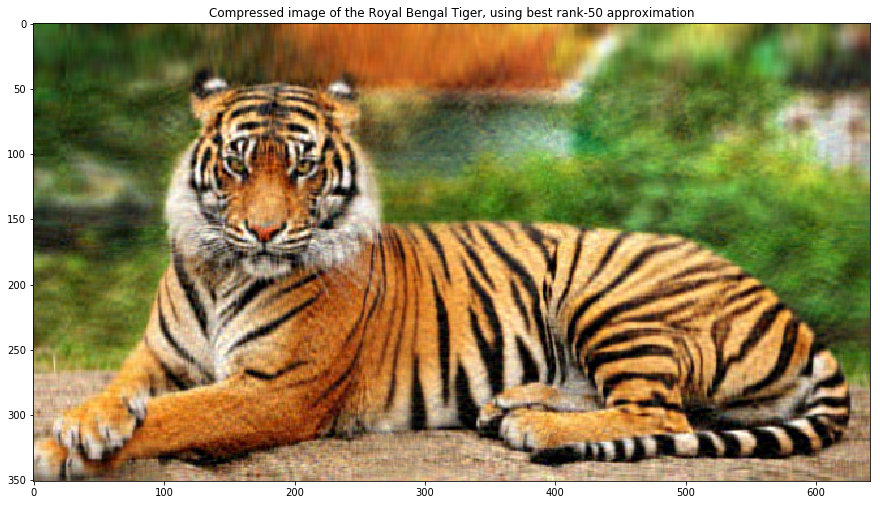

In [10]:
image_red_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

image_reconstructed = np.zeros((row, col, 3))

image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx

image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Compressed image of the Royal Bengal Tiger, using best rank-{} approximation'.format(k))
plt.show()

In [11]:
k = 10

U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

compressed_bytes = sum([matrix.nbytes for matrix in 
                        [U_r_k, d_r_k, V_r_k, U_g_k, d_g_k, V_g_k, U_b_k, d_b_k, V_b_k]])
print("Compressed matrices have total size: ", compressed_bytes/1024/1024, "MB")

Compressed matrices have total size:  0.227508544921875 MB


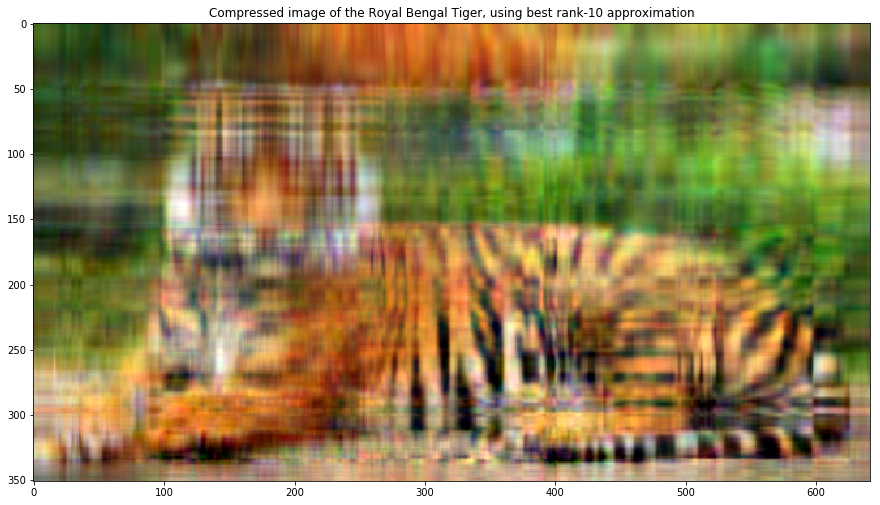

In [12]:
image_red_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

image_reconstructed = np.zeros((row, col, 3))
image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Compressed image of the Royal Bengal Tiger, using best rank-{} approximation'.format(k))
plt.show()

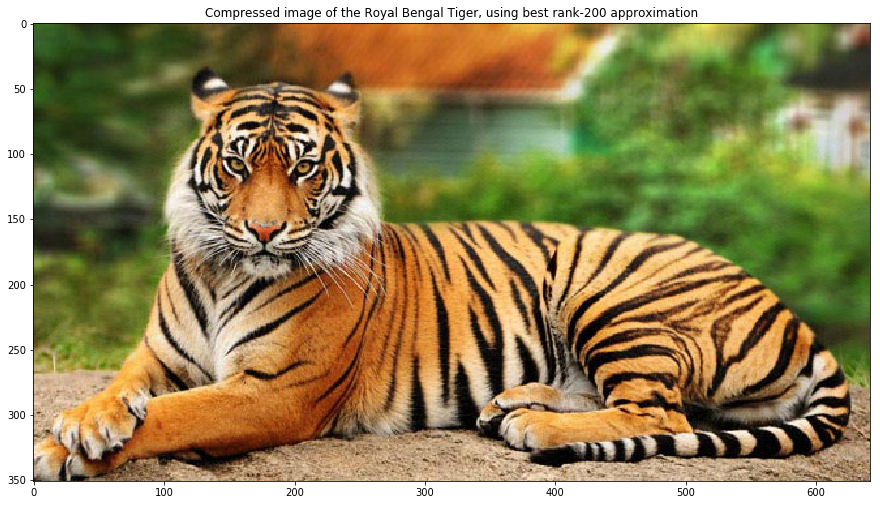

In [13]:
k = 200

U_r_k = U_r[:, 0:k]
V_r_k = V_r[0:k, :]
U_g_k = U_g[:, 0:k]
V_g_k = V_g[0:k, :]
U_b_k = U_b[:, 0:k]
V_b_k = V_b[0:k, :]

d_r_k = d_r[0:k]
d_g_k = d_g[0:k]
d_b_k = d_b[0:k]

image_red_approx = np.dot(U_r_k, np.dot(np.diag(d_r_k), V_r_k))
image_green_approx = np.dot(U_g_k, np.dot(np.diag(d_g_k), V_g_k))
image_blue_approx = np.dot(U_b_k, np.dot(np.diag(d_b_k), V_b_k))

image_reconstructed = np.zeros((row, col, 3))
image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

fig = plt.figure(figsize=(15, 10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(image_reconstructed)
a.set_title('Compressed image of the Royal Bengal Tiger, using best rank-{} approximation'.format(k))
plt.show()